In [1]:
import pandas as pd

df = pd.read_csv("Trips_2018.csv")

In [2]:
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [3]:
print(df.dtypes)

Unnamed: 0                   int64
tripduration                 int64
starttime                   object
stoptime                    object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
bikeid                       int64
usertype                    object
birth_year                   int64
gender                       int64
dtype: object


In [4]:
df['starttime'] = pd.to_datetime(df['starttime'], errors='coerce')

In [5]:
df['stoptime'] = pd.to_datetime(df['stoptime'], errors='coerce')

In [6]:
print(df['usertype'].unique())

['Subscriber' 'Customer']


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['usertype'] = label_encoder.fit_transform(df['usertype'])

In [8]:
print(df['gender'].unique())

[1 0 2]


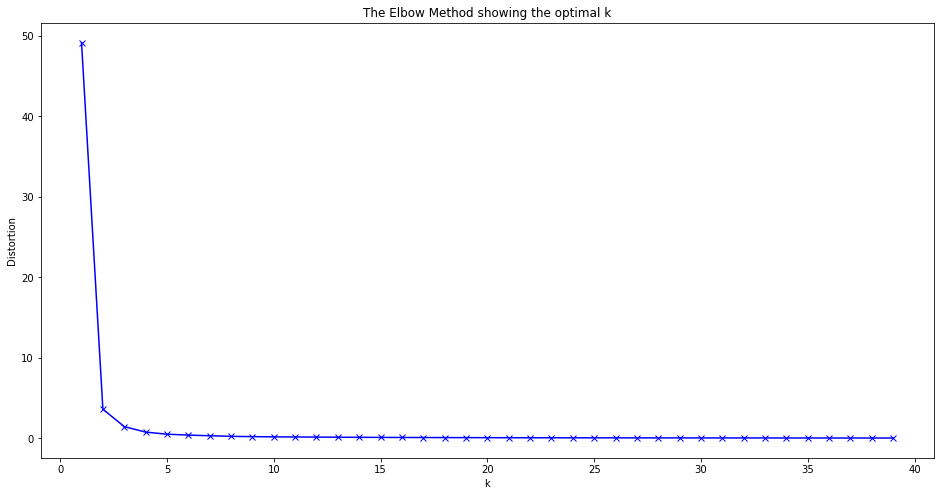

In [11]:
from sklearn.cluster import KMeans

distortions = []
K = range(1, 40) 
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(stations[['start_station_latitude', 'start_station_longitude']])
    distortions.append(kmeanModel.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


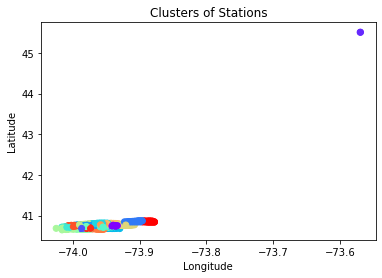

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

stations = df[['start_station_id', 'start_station_latitude', 'start_station_longitude']].drop_duplicates()

kmeans = KMeans(n_clusters=20, random_state=0).fit(stations[['start_station_latitude', 'start_station_longitude']])
stations['cluster'] = kmeans.labels_

plt.scatter(stations['start_station_longitude'], stations['start_station_latitude'], c=stations['cluster'], cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Stations')
plt.show()

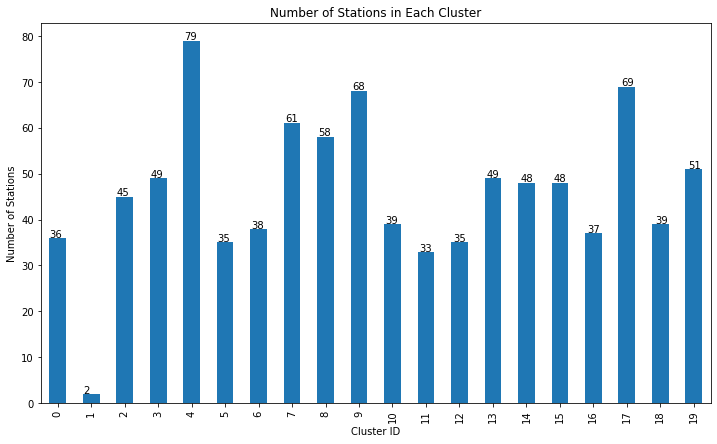

In [12]:
cluster_counts = stations.groupby('cluster').size()

ax = cluster_counts.plot(kind='bar', figsize=(12,7))
plt.xlabel('Cluster ID')
plt.ylabel('Number of Stations')
plt.title('Number of Stations in Each Cluster')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()


In [13]:
cluster_1_stations = stations[stations['cluster'] == 1]
print(cluster_1_stations)

        start_station_id  start_station_latitude  start_station_longitude  \
676612            3488.0               45.506364               -73.569463   
714485            3650.0               45.506264               -73.568906   

        cluster  
676612        1  
714485        1  


These 2 stations are located in Montreal, Canada. Therefore, they will be discarded.

In [14]:
stations = stations[stations['cluster'] != 1]

In [15]:
stations.head()

,start_station_id,start_station_latitude,start_station_longitude,cluster
0,72.0,40.767272,-73.993929,4
1324,79.0,40.719116,-74.006667,7
2430,82.0,40.711174,-74.000165,7
2866,83.0,40.683826,-73.976323,18
3551,119.0,40.696089,-73.978034,18


In [16]:
cluster_1_stations = stations[stations['cluster'] == 1]
print(cluster_1_stations)

Empty DataFrame
Columns: [start_station_id, start_station_latitude, start_station_longitude, cluster]
Index: []


In [20]:
merged_df = df.merge(stations[['start_station_id', 'cluster']], on='start_station_id', how='left')


In [18]:
merged_df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,cluster
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1,1992,1,4.0
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1,1969,1,4.0
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1,1956,1,4.0
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1,1974,1,4.0
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1,1992,1,4.0


In [21]:
merged_df['hour'] = pd.to_datetime(merged_df['starttime']).dt.hour

# Function to map hours to time intervals
def hour_to_interval(hour):
    if hour == 23:
        return "11-12pm"
    return f"{hour}-{hour + 1}{'am' if hour < 12 else 'pm'}"

merged_df['timeintervals'] = merged_df['hour'].apply(hour_to_interval)

# Group by 'cluster', 'start_station_id', and 'timeintervals'
grouped = merged_df.groupby(['cluster', 'start_station_id', 'timeintervals']).size().reset_index(name='pickups')

# Final DataFrame
result_df = grouped[['cluster', 'timeintervals', 'pickups']]

# Optionally, to view or export your result
result_df.head() # Print the first few rows

,cluster,timeintervals,pickups
0,0.0,0-1am,148
1,0.0,1-2am,65
2,0.0,10-11am,602
3,0.0,11-12am,618
4,0.0,11-12pm,268


In [27]:
merged_df.dtypes

Unnamed: 0                          int64
tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
usertype                            int32
birth_year                          int64
gender                              int64
cluster                           float64
hour                                int64
timeintervals                      object
dtype: object